In [2]:
import sys
import numpy as np
import pandas as pd
from agents.rl_drone import RLAgent
from agents.drone_sim_env import drone_sim

env = drone_sim()
agent = RLAgent(env)
ENV_NAME = 'drone'
#training_history=agent.agent.fit(env, nb_steps=100000, visualize=True, verbose=1, nb_max_episode_steps=10)

#After training is done, we save the final weights.
#agent.agent.save_weights('ddpg_{}_weights.h5f'.format(ENV_NAME), overwrite=True)
#agent.agent.load_weights('ddpg_{}_weights.h5f'.format(ENV_NAME))

# Finally, evaluate our algorithm for 5 episodes.


Using TensorFlow backend.


[23.619713    0.63145584]
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
____________________________________________

In [3]:


#After training is done, we save the final weights.

agent.agent.load_weights('ddpg_{}_weights.h5f'.format(ENV_NAME))
agent.agent.test(env, nb_episodes=1, visualize=True, verbose=1, nb_max_episode_steps=10,start_step_policy=1)

Testing for 1 episodes ...
Episode 1: reward: 18.693, steps: 10


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

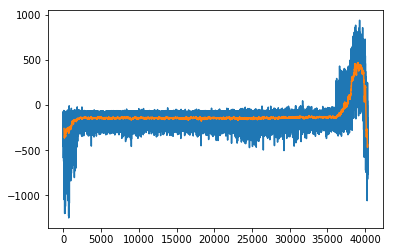

In [3]:
import matplotlib.pyplot as plt
df=pd.DataFrame()
df = pd.DataFrame(columns=['raw','MA'])
df['raw'] = training_history.history['episode_reward']
df['MA']= df.rolling(window=100).mean()
plt.plot(df)


In [17]:
print(agent.agent.forward([621, 404]))
print(agent.agent.forward([463, 76]))

[-56.646416 -44.977577]
[-57.505188  60.      ]
